# Análisis de ventas de productos digitales simuladas 
## Fase 2. Análisis exploratorio 
Comprender el comportamiento general del negocio y sus dimensiones clave

```mermaid
    graph LR
    A[1 <br> KPIs globales]
    B[2 <br> EDA por dimensiones]
    C[3 <br> Cohorts y recurrencia]
    
    A-->B
    B-->C

    style A fill: #105e6c
    style B fill: #318291
    style C fill: #325b63

```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/nat27/Desktop/Desktop/Proyectos/CienciaDatos/digital-sales-analytics/data/clean/digital_products_sales_cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          8000 non-null   int64  
 1   customer_id       8000 non-null   int64  
 2   product_name      8000 non-null   object 
 3   category          8000 non-null   object 
 4   price_usd         8000 non-null   float64
 5   quantity          8000 non-null   int64  
 6   discount_rate     8000 non-null   float64
 7   gross_amount_usd  8000 non-null   float64
 8   net_revenue_usd   8000 non-null   float64
 9   purchase_dt       8000 non-null   object 
 10  region            8000 non-null   object 
 11  channel           8000 non-null   object 
 12  payment_method    8000 non-null   object 
 13  order_date        8000 non-null   object 
 14  year              8000 non-null   int64  
 15  month             8000 non-null   int64  
 16  day               8000 non-null   int64  


In [2]:
# 1. KPIs globales  
total_net_revenue = data['net_revenue_usd'].sum()
total_gross_revenue = data['gross_amount_usd'].sum()
total_units_sold = data['quantity'].sum()
average_order_value = total_net_revenue / total_units_sold
maximum_order_value = data['net_revenue_usd'].max()
minimum_order_value = data['net_revenue_usd'].min()
average_discount = data['discount_rate'].mean()
print(f"Total Net Revenue: ${total_net_revenue:,.2f}")
print(f"Total Gross Revenue: ${total_gross_revenue:,.2f}")
print(f"Total Units Sold: {total_units_sold:,}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Maximum Order Value: ${maximum_order_value:,.2f}")
print(f"Minimum Order Value: ${minimum_order_value:,.2f}")
print(f"Average Discount Rate: {average_discount:.2%}")

Total Net Revenue: $374,647.04
Total Gross Revenue: $379,572.66
Total Units Sold: 9,664
Average Order Value: $38.77
Maximum Order Value: $236.28
Minimum Order Value: $2.55
Average Discount Rate: 1.29%


In [3]:
# 2. EDA por dimensiones 
categories = data['category'].value_counts()
regions = data['region'].value_counts()
payment_methods = data['payment_method'].value_counts()
print("Categories:\n", categories)
print("\nRegions:\n", regions)
print("\nPayment Methods:\n", payment_methods)

Categories:
 category
Ebook        3665
Curso        2009
Plantilla    1543
Musica        783
Name: count, dtype: int64

Regions:
 region
Desconocido    2828
EU             2032
LATAM          1931
ASIA            831
OTHER           378
Name: count, dtype: int64

Payment Methods:
 payment_method
Card      4447
PayPal    1996
Stripe    1405
Crypto     152
Name: count, dtype: int64


In [4]:
channels = data['channel'].value_counts()
print("\nChannels:\n", channels)


Channels:
 channel
Website        3457
Marketplace    2031
Email          1256
SocialAds      1256
Name: count, dtype: int64


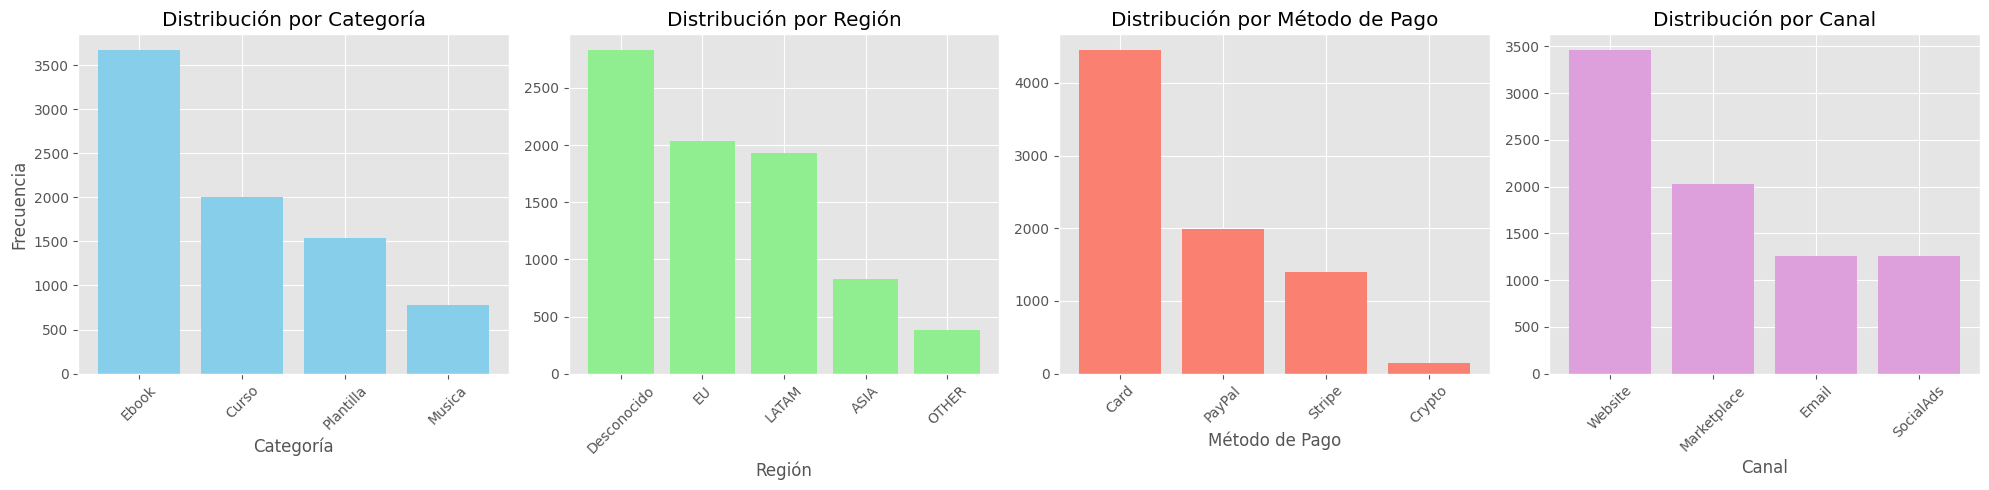

In [5]:
# Visualizaciones de las dimensiones

# Configurar estilo
plt.style.use('ggplot')

# Crear figuras
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Gráfica 1: Categorías
axes[0].bar(categories.index, categories.values, color='skyblue')
axes[0].set_title('Distribución por Categoría')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfica 2: Regiones
axes[1].bar(regions.index, regions.values, color='lightgreen')
axes[1].set_title('Distribución por Región')
axes[1].set_xlabel('Región')
axes[1].tick_params(axis='x', rotation=45)

# Gráfica 3: Métodos de pago
axes[2].bar(payment_methods.index, payment_methods.values, color='salmon')
axes[2].set_title('Distribución por Método de Pago')

axes[2].set_xlabel('Método de Pago')
axes[2].tick_params(axis='x', rotation=45)

# Gráfica 4: Canales
axes[3].bar(channels.index, channels.values, color='plum')
axes[3].set_title('Distribución por Canal')
axes[3].set_xlabel('Canal')
axes[3].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()



In [6]:
# 3. Cohorts clientes 
# Cantidad de clientes únicos 
total_unique_customers = data['customer_id'].nunique()
print(f"\nTotal de Clientes Únicos: {total_unique_customers:,}")


Total de Clientes Únicos: 995


In [7]:
# Rangos de los id de clientes
min_customer_id = data['customer_id'].min()
max_customer_id = data['customer_id'].max()
print(f"\nRango de IDs de Clientes: {min_customer_id} - {max_customer_id}")


Rango de IDs de Clientes: 1 - 2498


In [8]:
# Clientes con más de una compra
repeated_customers = data['customer_id'].value_counts().gt(1).sum()
print(f"\nClientes con más de una compra: {repeated_customers:,}")


Clientes con más de una compra: 441


In [9]:
# Clientes con una sola compra
single_purchase_customers = data['customer_id'].value_counts().eq(1).sum()
print(f"\nClientes con una sola compra: {single_purchase_customers:,}")


Clientes con una sola compra: 554


In [10]:
# Compras de clientes recurrentes vs nuevos
data['is_repeated_customer'] = data.duplicated(subset=['customer_id'], keep=False).astype(int)
repeated_customers = data['is_repeated_customer'].value_counts()
print("\nCompras de clientes Recurrentes vs Nuevos:\n", repeated_customers)


Compras de clientes Recurrentes vs Nuevos:
 is_repeated_customer
1    7446
0     554
Name: count, dtype: int64


Text(0.5, 1.0, 'Cantidad de compras de clientes Recurrentes vs Nuevos')

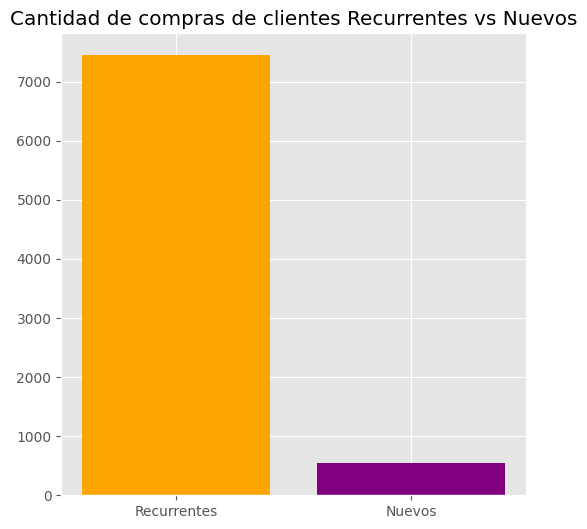

In [11]:
# Visualización de compras de clientes recurrentes vs nuevos
plt.figure(figsize=(6, 6))
plt.bar(repeated_customers.index.map({0: 'Nuevos', 1: 'Recurrentes'}), repeated_customers.values, color=['orange', 'purple'])
plt.title('Cantidad de compras de clientes Recurrentes vs Nuevos')

In [12]:
# Top 10 clientes por ingresos netos
top_customers = data.groupby('customer_id')['net_revenue_usd'].sum().nlargest(10)
print("\nTop 10 Clientes por Ingresos Netos:\n", top_customers)


Top 10 Clientes por Ingresos Netos:
 customer_id
1     88350.46
2     35677.24
3     22570.94
4     14603.35
5     10754.29
6      9162.43
7      8801.40
8      7316.41
10     4997.95
9      4837.50
Name: net_revenue_usd, dtype: float64


In [13]:
# Cliente que más ha gastado
top_spender = top_customers.idxmax()
top_spender_amount = top_customers.max()
print(f"\nCliente que más ha gastado: {top_spender} con un total de ${top_spender_amount:,.2f}")


Cliente que más ha gastado: 1 con un total de $88,350.46


In [14]:
# Cliente que menos ha gastado entre el total de clientes
bottom_spender = data.groupby('customer_id')['net_revenue_usd'].sum().idxmin()
bottom_spender_amount = data.groupby('customer_id')['net_revenue_usd'].sum().min()
print(f"\nCliente que menos ha gastado: {bottom_spender} con un total de ${bottom_spender_amount:,.2f}")


Cliente que menos ha gastado: 1962 con un total de $2.85


C:\Users\nat27\AppData\Local\Temp\ipykernel_13208\3627281557.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M')['net_revenue_usd'].sum()


Text(0.5, 1.0, 'Ventas Mensuales Totales')

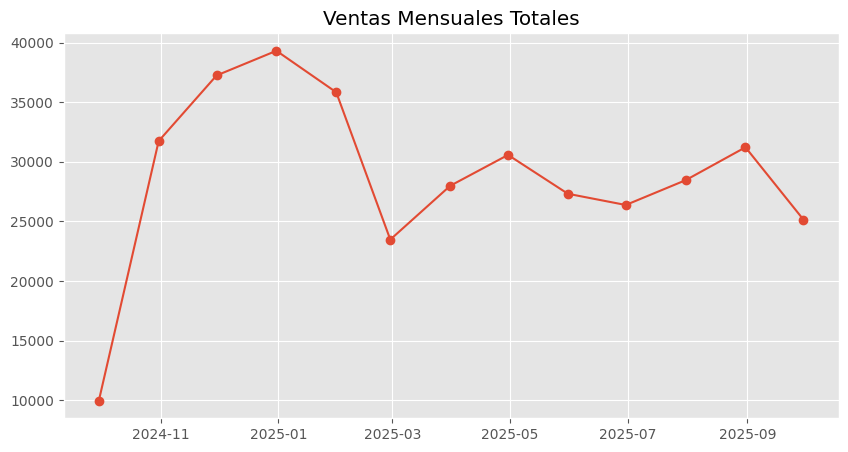

In [15]:
# Análisis temporal de compras
data['order_date'] = pd.to_datetime(data['order_date'])
data.set_index('order_date', inplace=True)
monthly_sales = data.resample('M')['net_revenue_usd'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Ventas Mensuales Totales')

In [ ]:
# Categoría que genera más ingresos netos
category_revenue = data.groupby('category')['net_revenue_usd'].sum().sort_values(ascending=False)
print("\nIngresos Netos por Categoría:\n", category_revenue)   
 


Ingresos Netos por Categoría:
 category
Curso        239121.24
Ebook         60256.95
Plantilla     44047.66
Musica        31221.19
Name: net_revenue_usd, dtype: float64


Text(0.5, 1.0, 'Ingresos Netos por Categoría')

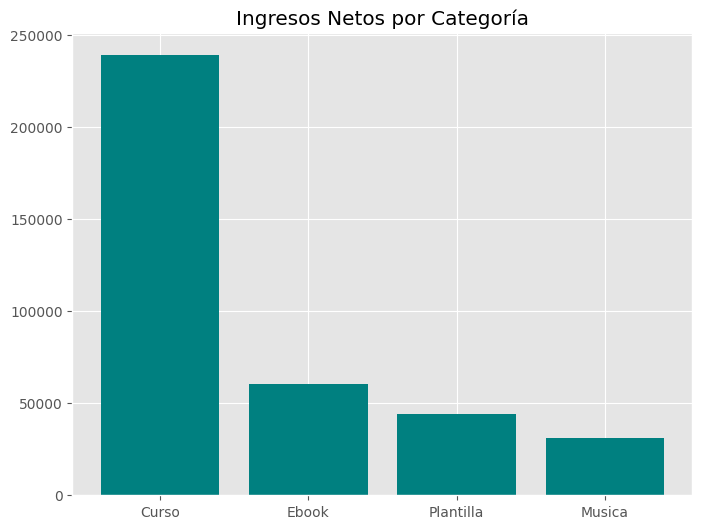

In [17]:
# Visualización de ingresos netos por categoría
plt.figure(figsize=(8, 6))  
plt.bar(category_revenue.index, category_revenue.values, color='teal')
plt.title('Ingresos Netos por Categoría')

In [18]:
# Porcentaje de las compras que ha hecho el cliente que más ha gastado
total_revenue = data['net_revenue_usd'].sum()
top_spender_revenue = data.groupby('customer_id')['net_revenue_usd'].sum().max()
percentage_top_spender = (top_spender_revenue / total_revenue) * 100    
print(f"\nPorcentaje de ingresos generados por el cliente que más ha gastado: {percentage_top_spender:.2f}%")   


Porcentaje de ingresos generados por el cliente que más ha gastado: 23.58%


In [22]:
# Categorías en las que más ha gastado el cliente que más ha gastado
top_spender_id = top_spender
top_spender_categories = data[data['customer_id'] == top_spender_id].groupby('category')['net_revenue_usd'].sum().sort_values(ascending=False)
print(f"\nCategorías en las que más ha gastado el cliente {top_spender_id}:\n", top_spender_categories)


Categorías en las que más ha gastado el cliente 1:
 category
Curso        58861.12
Ebook        12861.26
Plantilla     9845.77
Musica        6782.31
Name: net_revenue_usd, dtype: float64


Text(0.5, 0, 'Categoría')

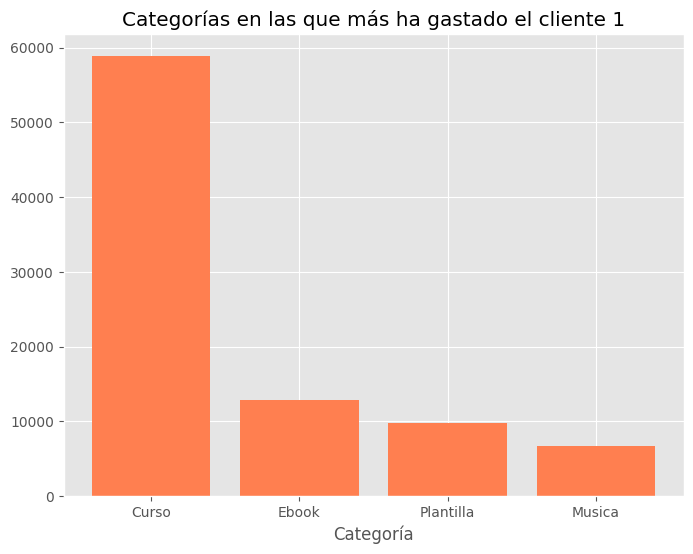

In [23]:
# Visualizaciones de categorías en las que más ha gastado el cliente que más ha gastado
plt.figure(figsize=(8, 6))
plt.bar(top_spender_categories.index, top_spender_categories.values, color='coral')
plt.title(f'Categorías en las que más ha gastado el cliente {top_spender_id}')
plt.xlabel('Categoría')